# Signal Pocessing
In this notebook we will go over basic signal processing and acoustics to help build an understanding before applying machine learning. This notebook is designed provide an introduction to understanding wave representations and how it relates to acoustics. 

### Topics 
1) 1D waves
2) Fast Fourier Transforms
3) High pass, low pass, and band pass filters
4) Convolution and Correlation
5) Spectral Windowing
6) Magnitude and Phase
7) Smoothing
8) Example Sounds

How does signal processing impact machine learning for acoustics you may ask. This is a very interesting question and one that is still being explored today. Machine learning is contigent on the amount of data points or the type of frequency time representation you use. In many cases this goes hand in hand. 

Created by Ryan A. McCarthy

In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import librosa 
import librosa.display
import IPython.display as ipd

from glob import glob

## Example Sounds
Below is an example acoustic sound and looking at the frequency sounds we hear.

In [13]:
filename = librosa.ex('trumpet')
y, sr = librosa.load(filename)

In [24]:
# Find audio file
audio_files = glob('../input/ravdess-emotional-speech-audio/*/*.wav')

# Play audio file
ipd.Audio(data=y,rate = sr)

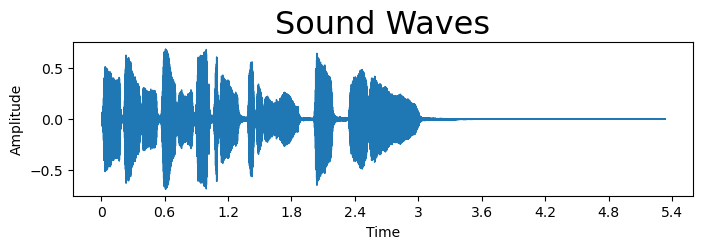

In [26]:
plt.figure(figsize = (8, 2))
librosa.display.waveshow(y = y, sr = sr);
plt.title("Sound Waves", fontsize = 23);
plt.ylabel('Amplitude')
plt.show()

## Discrete vs Continuous Signals
What are discrete and continuous signals? This is defined as such:

<u>Continous Signal</u>: values over all points in time within a given time interval which may be infinite. Examples of such are light waves which travel through space or sound waves that travel to your ears. These are also refered to as analog signals.

<u>Discrete Signal</u>: values only at discrete points in time within a given time interval. Examples of such are wav audio files. These are also refered to as digital signals. 

### Discrete signals in machine learning
Although it would be incredible to process continuous signals through machine learning, many times we use instruments and sampling to measure things such as sound traveling through different mediums (e.g. water or air). When we sample a signal we are losing information which may or may not be important. To understand this better we show the example below of a cosine wave that has more and less samples.

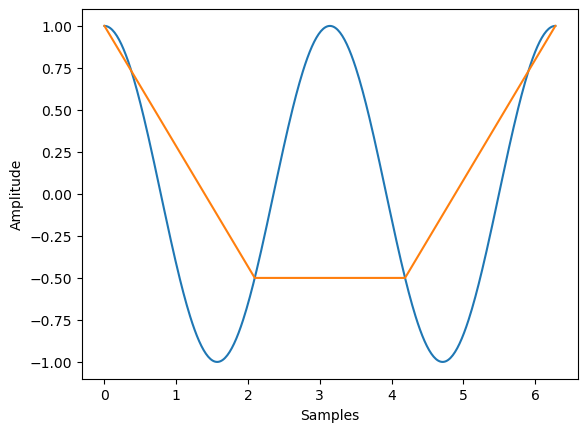

In [8]:
fs = 2
x = np.linspace(0, 2*np.pi, 401)
y = np.linspace(0,2*np.pi,4)

plt.plot(x,np.cos(fs*x))
plt.plot(y,np.cos(fs*y))
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

We can see from the above that by changing the amount we sample, we lose information about the signal. This will result in being unable to identify the cosine and changing it's frequency, this is known as aliasing. A formal definition of this is:

<u>Aliasing</u>: measurement error that results in undersampling a signal. 

To improve our signal, we need to take more samples, however, by taking more samples we need more space on our device or one that will sample at a higher rate. This has some implications toward machine learning that we will dive deeper into later. 

### Nyquist Theorem
How do we still capture the sin wave while still maintaining . 

Nyquist sampling is defined as:

$$
    f_s > 2B
$$
where B is the bandwidth of the signal or the max frequency.

Now that we know this, we can resample the previous cosine wave and are able to capture the signal. 

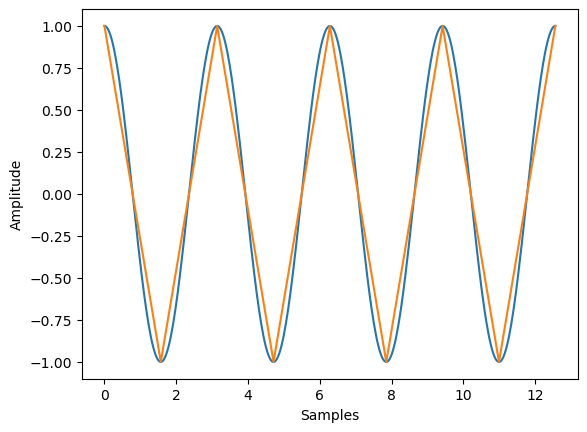

In [11]:
fs = 2 # sampling rate
L = 4 # length of signal
x = np.linspace(0, L*np.pi, 401)
y = np.linspace(0,L*np.pi,fs*L+1)

plt.plot(x,np.cos(fs*x))
plt.plot(y,np.cos(fs*y))
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

## 1D Waves
The simpliest 1D sine wave can be represented as:

$$
    A(x,t)=B \sin(kx−\omega t+ \phi)
$$
where:
- B -> the maximum amplitude of the wave from the highest point (the crest) and the lowest point (trough) of one wave cycle.\n
- x -> is the space coordinate
- t -> is the time coordinate
- k -> wave number
- ω -> angular frequency
- ϕ -> phase

Changing the amplitude impacts the height of the signal while changing the frequency changes the rate at which a signal oscillates over time. When we change the phase, we are shifting the signal to the right or the left (in a 1D case) along the x-axis. 

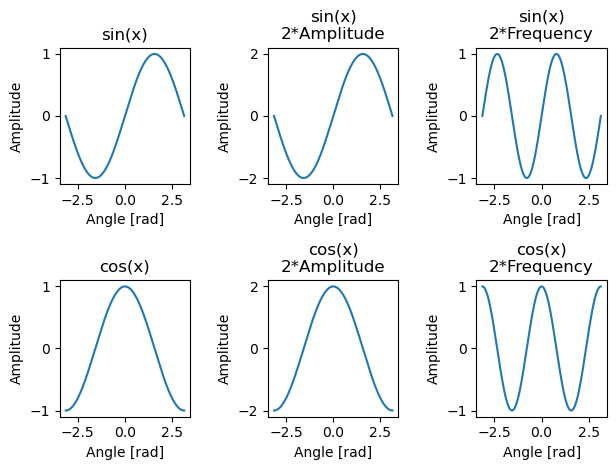

In [29]:
# Create x data
x = np.linspace(-np.pi, np.pi, 201)

# Plot sine and cosine and variations
plt.subplot(2, 3, 1)
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.title('sin(x)')

plt.subplot(2,3, 4)
plt.plot(x, np.cos(x))
plt.xlabel('Angle [rad]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.title('cos(x)')

plt.subplot(2,3, 2)
plt.plot(x, 2*np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.title('sin(x)\n2*Amplitude')

plt.subplot(2,3, 5)
plt.plot(x, 2*np.cos(x))
plt.xlabel('Angle [rad]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.title('cos(x)\n2*Amplitude')

# change the frequency
plt.subplot(2, 3, 3)
plt.plot(x, np.sin(x*2))
plt.xlabel('Angle [rad]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.title('sin(x)\n2*Frequency')

plt.subplot(2,3, 6)
plt.plot(x, np.cos(x*2))
plt.xlabel('Angle [rad]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.title('cos(x)\n2*Frequency')

plt.tight_layout()
plt.show()

### Sine and Cosine 
Sine and cosine can be represented using eulers formula:

$$
    e^{ix} = \cos (x) + i \sin (x)
$$
where:
- e is the natural logarithm
- i is the imaginary unit
- x is the angle in radians

$$
\cos(x) = \frac{e^{ix} + e^{-ix}}{2}
$$
$$
\sin(x) = \frac{e^{ix} - e^{-ix}}{2i}
$$

This relationship builds the foundation for processes discussed later in this notebook.

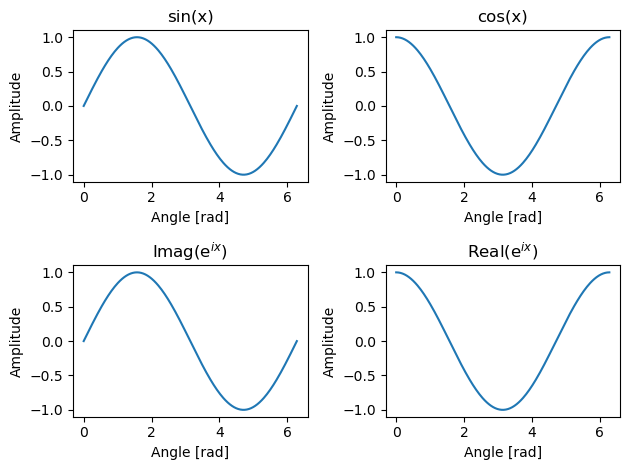

In [28]:
x = np.linspace(0, 2*np.pi, 201)
plt.subplot(2, 2, 1)
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.title('sin(x)')

plt.subplot(2,2, 2)
plt.plot(x, np.cos(x))
plt.xlabel('Angle [rad]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.title('cos(x)')

plt.subplot(2, 2, 3)
plt.plot(x,np.imag( (np.exp(1j*x) - np.exp(-1j*x))/2))
plt.xlabel('Angle [rad]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.title('Imag(e$^{ix}$)')

plt.subplot(2,2, 4)
plt.plot(x, np.real( (np.exp(1j*x) + np.exp(-1j*x))/2))
plt.xlabel('Angle [rad]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.title('Real(e$^{ix}$)')

plt.tight_layout()
plt.show()

### Angular relationship
Euler's formula states that for any real number x, one has:

$$
    e^{ix} = \cos(x) + i \sin(x)
$$
where e is the base of the natural logarithm. This can be interpreted in the complex plane as a unit circle. The complex plane ranges from 0 to $2\pi$ or 0 to 360 degrees moving counterclockwise. 

C:\Users\ryan-\AppData\Local\Temp\ipykernel_16508\539501605.py:13: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(['_','x=0','x=pi/2','x=pi'])


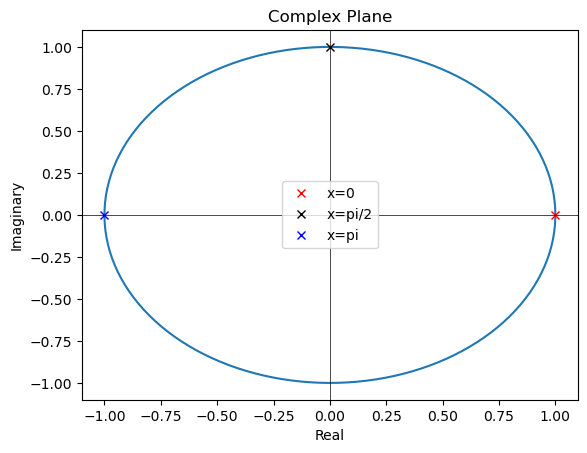

In [31]:
x = np.linspace(0,2*np.pi,300)
re = np.cos(x)
im = np.sin(x)
plt.plot(re,im)
plt.plot(np.cos(0),np.sin(0),'rx')
plt.plot(np.cos(np.pi/2),np.sin(np.pi/2),'kx')
plt.plot(np.cos(np.pi),np.sin(np.pi),'bx')
plt.axhline(y=0,color='black',linewidth=0.5)
plt.axvline(x=0,color='black',linewidth=0.5)
plt.title('Complex Plane')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.legend(['_','x=0','x=pi/2','x=pi'])
plt.show()

### Combining Waves
Here we combine two independent waves with differing frequencies. When combined, they make a linearly combined signal which have constructive and destructive interference.

Constructive interference: When two waves that are in phase with each other, their amplitudes get added together resulting in a larger amplitude.

Destructive interference: When two waves that are out of phase with each other, amplitudes get added and results in a smaller amplitude wave. 

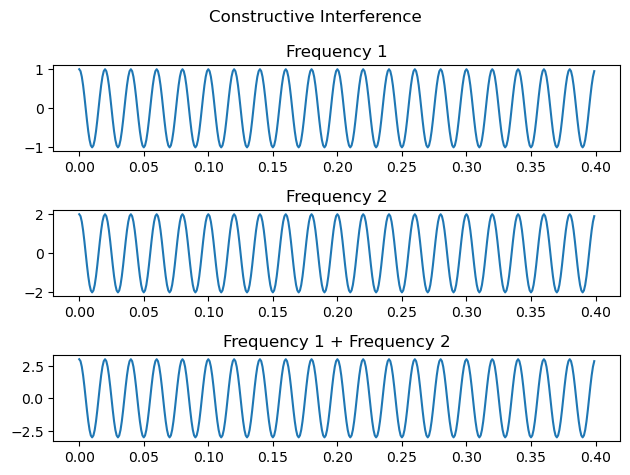

In [38]:
# Constructive interference example
N = 400
# sample spacing
T = 1.0 / 1000.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.real(np.exp(50.0 * 1.j * 2.0*np.pi*x)) #+ 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
plt.subplot(3,1,1)
plt.plot(x,y)
plt.title('Frequency 1')

y1 = np.real(2*np.exp(50.0 * 1.j * 2.0*np.pi*x))
plt.subplot(3,1,2)
plt.plot(x,y1)
plt.title('Frequency 2')

y2 = y+y1
plt.subplot(3,1,3)
plt.plot(x,y2)
plt.title('Frequency 1 + Frequency 2')

plt.suptitle('Constructive Interference')
plt.tight_layout()

plt.show()

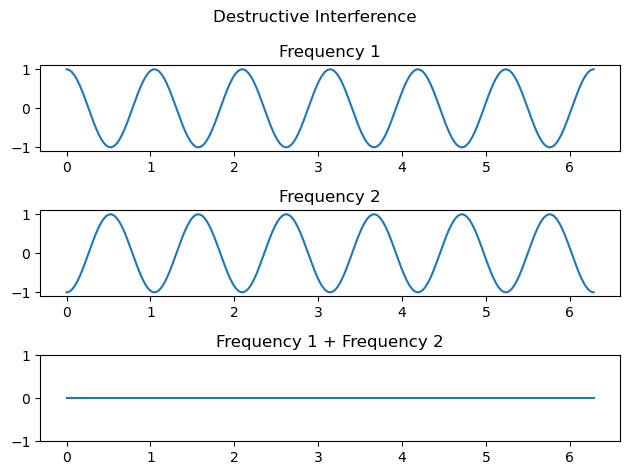

In [55]:
# Destructive interference example
x = np.linspace(0, 2*np.pi, 201)
y = np.real(np.cos(6*x)) 
plt.subplot(3,1,1)
plt.plot(x,y)
plt.title('Frequency 1')

y1 = np.real(np.cos(6*x-np.pi)) # pi is 180 degrees out of phase
plt.subplot(3,1,2)
plt.plot(x,y1)
plt.title('Frequency 2')

y2 = y+y1
plt.subplot(3,1,3)
plt.plot(x,y2)
plt.title('Frequency 1 + Frequency 2')
plt.ylim(-1,1)

plt.suptitle('Destructive Interference')
plt.tight_layout()

plt.show()

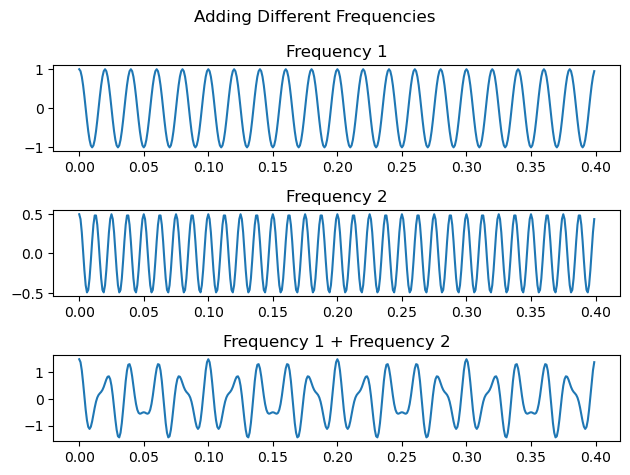

In [37]:
N = 400
# sample spacing
T = 1.0 / 1000.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.real(np.exp(50.0 * 1.j * 2.0*np.pi*x)) #+ 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
plt.subplot(3,1,1)
plt.plot(x,y)
plt.title('Frequency 1')

y1 = np.real(0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x))
plt.subplot(3,1,2)
plt.plot(x,y1)
plt.title('Frequency 2')

y2 = y+y1
plt.subplot(3,1,3)
plt.plot(x,y2)
plt.title('Frequency 1 + Frequency 2')

plt.suptitle('Adding Different Frequencies')

plt.tight_layout()
plt.show()

## Convolution or Correlation?
A mathematical operation that combines two signals to create a third signal by integrating the amount of overalap between the two. This is what describes both a convolution and a correlation. There is a big difference between the two however:

<u>Convolution</u>: Mathematical function 

<u>Correlation</u>: Mathematical operation that is used to measure the similarity of two signals.

Convolution is mathematically defined as:

$$
    (f*g)(t) = \int_{-\inf}^{inf}f(t)g(x-t)dt
$$
Essentially, this is looking at the sum of overlaps of one signal and all shifter versions of the other signal.

The convolution of two signals in time is the product of signals in Fourier space. This works vice versa as well, i.e. the convolution of two signals in Fourier space is the multiplication in time.

Conversely, a correlation is defined mathemeatically as:

$$
    (f*g)(t) = \int_{-\inf}^{inf}f(t)g(x-t)dx
$$

In [2]:
from scipy import signal

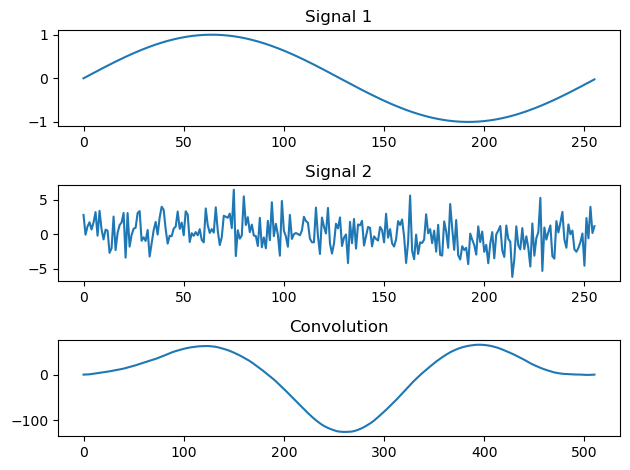

In [14]:
x = np.arange(256)/256
segment1 = np.sin(2*np.pi*x)
segment2 = segment1 + np.random.normal(0,2,len(segment1))
plt.subplot(3,1,1)
plt.plot(segment1)
plt.title('Signal 1')

plt.subplot(3,1,2)
plt.plot(segment2)
plt.title('Signal 2')

plt.subplot(3,1,3)
plt.plot(np.convolve(segment1,segment2))
plt.title('Convolution')

plt.tight_layout()

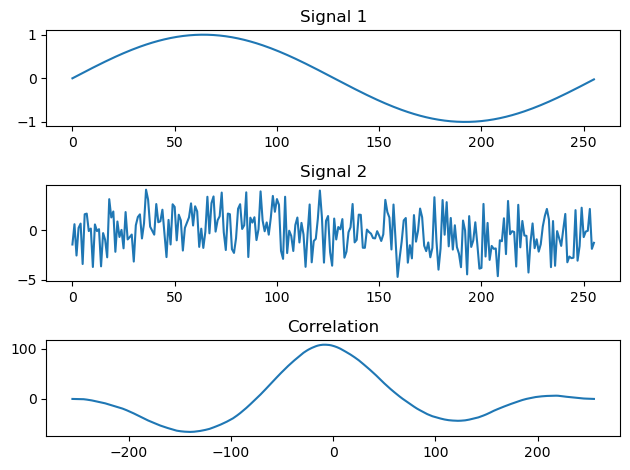

In [15]:
x = np.arange(256)/256
segment1 = np.sin(2*np.pi*x)
segment2 = segment1 + np.random.normal(0,2,len(segment1))
plt.subplot(3,1,1)
plt.plot(segment1)
plt.title('Signal 1')

plt.subplot(3,1,2)
plt.plot(segment2)
plt.title('Signal 2')

plt.subplot(3,1,3)
corr = signal.correlate(segment1,segment2)
lags = signal.correlation_lags(len(segment1), len(segment2))
plt.plot(lags,corr)
plt.title('Correlation')

plt.tight_layout()

## Smoothing
Smoothing involves modifying data points in a signal to remove noisy samples. This helps to identify trends and improve the quality of your signal. There are several different smoothing techniques that will be highlighted briefly.
1) Moving Average Smoothing
2) Moving Median Smoothing
3) Savitzky-Golay Filter
4) Gaussian Filter

### Moving Average Smoothing
The moving average smoothing elimanates noise by taking a window of the signal (ex. 10 discrete points), finds the average over these points and uses the average value as the value for that point. This is seen as:

$$
    y[x] = \frac{X_{t},X_{t+1},...,X_{t+L-1}}{L}
$$
where:
- $y[x]$ is the new smoothed signal
- L is the length of the window

In [56]:
# import packages
from scipy.signal import savgol_filter
from scipy.signal import 

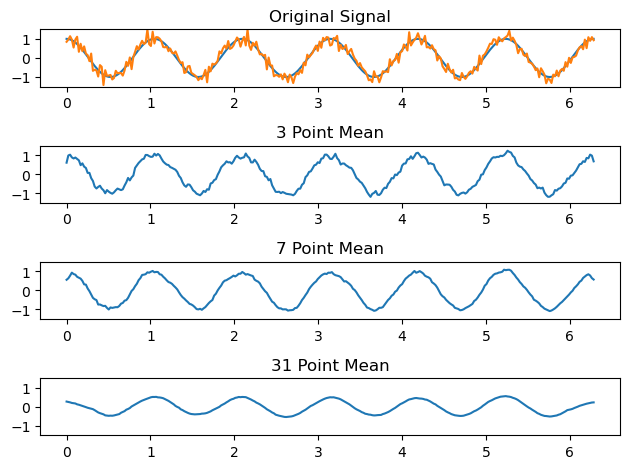

In [60]:
x = np.linspace(0, 2*np.pi, 301)
signal = np.cos(6*x)
noisysignal = signal + np.random.normal(0,.2,301)

# moving mean of 3 points
N = 3
newsignal3point = np.convolve(noisysignal, np.ones(N)/N, mode='same')
# moving mean of 7 points
N = 7
newsignal7point = np.convolve(noisysignal, np.ones(N)/N, mode='same')
# moving mean of 31 points
N = 31
newsignal31point = np.convolve(noisysignal, np.ones(N)/N, mode='same')

plt.subplot(4,1,1)
plt.plot(x,signal)
plt.plot(x,noisysignal)
plt.title('Original Signal')
plt.ylim(-1.5,1.5)

plt.subplot(4,1,2)
plt.plot(x,newsignal3point)
plt.title('3 Point Mean')
plt.ylim(-1.5,1.5)

plt.subplot(4,1,3)
plt.plot(x,newsignal7point)
plt.title('7 Point Mean')
plt.ylim(-1.5,1.5)

plt.subplot(4,1,4)
plt.plot(x,newsignal31point)
plt.title('31 Point Mean')
plt.ylim(-1.5,1.5)

plt.tight_layout()
plt.show()

### Moving Median Smoothing
Similar to the moving mean, the moving median computes the median value over the window of the signal and defines the new point as the median. 

In [57]:
from scipy.signal import medfilt

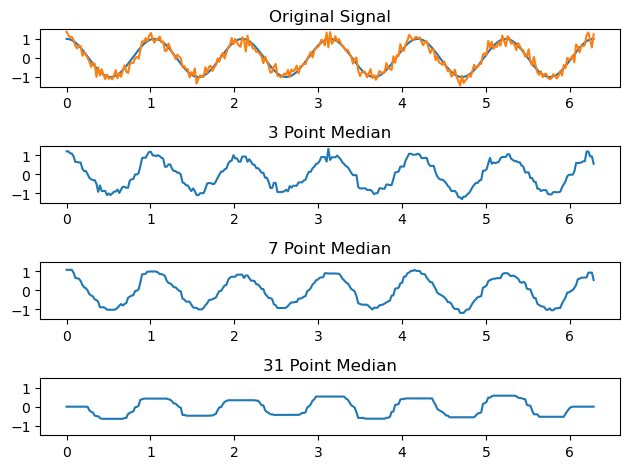

In [80]:
x = np.linspace(0, 2*np.pi, 301)
signal = np.cos(6*x)
noisysignal = signal + np.random.normal(0,.2,301)

# moving median of 3 points
newsignal3point = medfilt(noisysignal, kernel_size=3)
# moving median of 7 points
newsignal7point = medfilt(noisysignal, kernel_size=7)
# moving median of 31 points
newsignal31point = medfilt(noisysignal, kernel_size=31)

plt.subplot(4,1,1)
plt.plot(x,signal)
plt.plot(x,noisysignal)
plt.title('Original Signal')
plt.ylim(-1.5,1.5)

plt.subplot(4,1,2)
plt.plot(x,newsignal3point)
plt.title('3 Point Median')
plt.ylim(-1.5,1.5)

plt.subplot(4,1,3)
plt.plot(x,newsignal7point)
plt.title('7 Point Median')
plt.ylim(-1.5,1.5)

plt.subplot(4,1,4)
plt.plot(x,newsignal31point)
plt.title('31 Point Median')
plt.ylim(-1.5,1.5)

plt.tight_layout()
plt.show()

### Savitzky-Golay Filter
The Savitzky-Golay filter smooths the data by fitting successive sub-sets of adjacent points with low-degree polynomial using a linear least square fit. This preserves the features of the original signal that may be lost using other techniques. This works by using a sliding window of fixed size over the data and fitting a polynomial to the points. The polynomial is expressed as:

$$
    y = \alpha_0 + \alpha_1x+...+\alpha_px^p
$$
where p is the polynomial degree. At a given point, the coefficients for best fit are acheived by solving the equation:

$$
    \min \sum_{i=-m}^m(y_{k+i}-\sum_{j=0}^pa_jx^j_{k+i})
$$
where y_

In [79]:
from scipy.signal import savgol_filter

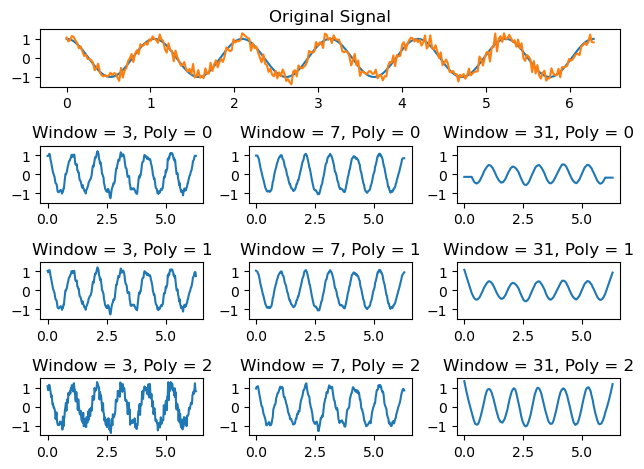

In [92]:
x = np.linspace(0, 2*np.pi, 301)
signal = np.cos(6*x)
noisysignal = signal + np.random.normal(0,.2,301)

plt.subplot(4,1,1)
plt.plot(x,signal)
plt.plot(x,noisysignal)
plt.title('Original Signal')
plt.ylim(-1.5,1.5)

plt.subplot(4,3,4)
plt.plot(x,savgol_filter(noisysignal,3,polyorder=0))
plt.title('Window = 3, Poly = 0')
plt.ylim(-1.5,1.5)

plt.subplot(4,3,5)
plt.plot(x,savgol_filter(noisysignal,7,polyorder=0))
plt.title('Window = 7, Poly = 0')
plt.ylim(-1.5,1.5)

plt.subplot(4,3,6)
plt.plot(x,savgol_filter(noisysignal,31,polyorder=0))
plt.title('Window = 31, Poly = 0')
plt.ylim(-1.5,1.5)

plt.subplot(4,3,7)
plt.plot(x,savgol_filter(noisysignal,3,polyorder=1))
plt.title('Window = 3, Poly = 1')
plt.ylim(-1.5,1.5)

plt.subplot(4,3,8)
plt.plot(x,savgol_filter(noisysignal,7,polyorder=1))
plt.title('Window = 7, Poly = 1')
plt.ylim(-1.5,1.5)

plt.subplot(4,3,9)
plt.plot(x,savgol_filter(noisysignal,31,polyorder=1))
plt.title('Window = 31, Poly = 1')
plt.ylim(-1.5,1.5)

plt.subplot(4,3,10)
plt.plot(x,savgol_filter(noisysignal,3,polyorder=2))
plt.title('Window = 3, Poly = 2')
plt.ylim(-1.5,1.5)

plt.subplot(4,3,11)
plt.plot(x,savgol_filter(noisysignal,7,polyorder=2))
plt.title('Window = 7, Poly = 2')
plt.ylim(-1.5,1.5)

plt.subplot(4,3,12)
plt.plot(x,savgol_filter(noisysignal,31,polyorder=2))
plt.title('Window = 31, Poly = 2')
plt.ylim(-1.5,1.5)

plt.tight_layout()
plt.show()

### Gaussian Smoothing 
This is a 1-D Gaussian filter that uses Gaussian distribution to perform a weighted average of surrounding values. 

In [87]:
from scipy.ndimage import gaussian_filter1d

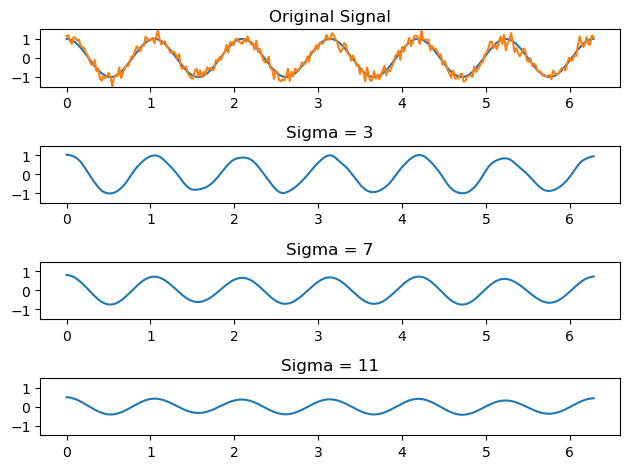

In [91]:
x = np.linspace(0, 2*np.pi, 301)
signal = np.cos(6*x)
noisysignal = signal + np.random.normal(0,.2,301)

plt.subplot(4,1,1)
plt.plot(x,signal)
plt.plot(x,noisysignal)
plt.title('Original Signal')
plt.ylim(-1.5,1.5)

plt.subplot(4,1,2)
plt.plot(x,gaussian_filter1d(noisysignal,3))
plt.title('Sigma = 3')
plt.ylim(-1.5,1.5)

plt.subplot(4,1,3)
plt.plot(x,gaussian_filter1d(noisysignal,7))
plt.title('Sigma = 7')
plt.ylim(-1.5,1.5)

plt.subplot(4,1,4)
plt.plot(x,gaussian_filter1d(noisysignal,11))
plt.title('Sigma = 11')
plt.ylim(-1.5,1.5)

plt.tight_layout()
plt.show()

## Fast Fourier Transforms
In this section we will discuss fast fourier transforms (fft) and inverse fourier transforms (ifft). 

The Fourier transform is:
$$
    F(\omega) = \int^{\inf}_{-\inf}f(x)e^{-i\omega x}dx
$$

and the inverse Fourier transform is:

$$
    f(x) = \frac{1}{2 \pi} \int^{\inf}_{-\inf} F(\omega)e^{i\omega x}d\omega
$$

When the signal is discrete and periodic, we use the discrete Fourier transform. Given a signal $x[n]$, the FFT is seen as:

$$
    X[k] = \sum^{N-1}_{n=0} = x[n]e^{\frac{-j2\pi kn}{N}}
$$
where k = 0,...,n-1

The discrete IFFT is:
$$
    x[k] = \sum^{N-1}_{n=0} = X[n]e^{\frac{-j2\pi kn}{N}}
$$

In the discrete case, the DFT treats the signal as if it were periodic. Using the DFT, it can pull out information about the frequencies that are observed in the signal. The example below demonstrates this.

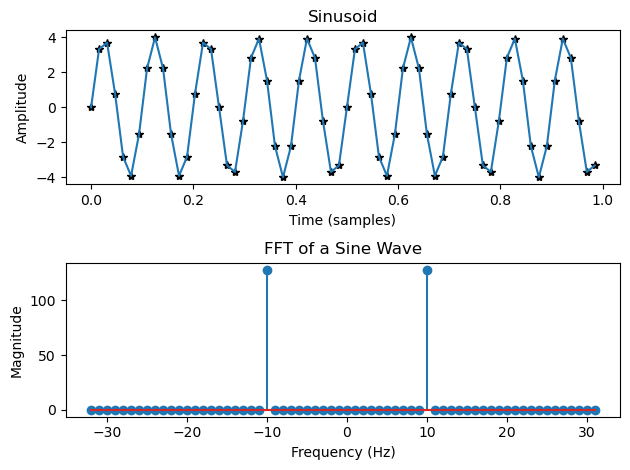

In [159]:
# Parameters:
fs = 64  # Sampling rate (samples per second)
T = 1  # Duration of the signal (seconds)
t = np.arange(0, T, 1/fs)  # Time vector
f = 10  # Frequency of the sine wave (Hz)
A = 4 # Amplitude
x = A*np.sin(2 * np.pi * f * t)

# Compute the FFT
X = np.fft.fft(x)
freqs = np.fft.fftfreq(len(x), 1/fs)

# Plot time data:
plt.subplot(2,1,1)
plt.plot(t,x,'*k')        
plt.plot(t,x) 
plt.title('Sinusoid')
plt.xlabel('Time (samples)') 
plt.ylabel('Amplitude')

# Plot the results
plt.subplot(2,1,2)
plt.stem(freqs, np.abs(X))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of a Sine Wave')

plt.tight_layout()
plt.show()

In the example above, we can see that the DFT pulled out the 10 Hz frequency sine wave from the signal. The two peaks in the magnitude plot located at the normalized frequencies is what we expect because:

$$
    DFT(\sin(\omega n)) = A\sum^{N-1}_{n=0}\frac{e^{j0n}}{2} = A\frac{N}{2}
$$
where N is the number of samples and A is the amplitude.

### Inverse Fourier Transform
Inverse or backward Fourier transform to go from frequency to time. 

$$
    x[n] = \frac{1}{N}\sum^{N-1}_{k=0}X[k]W_N^{-nk}
$$

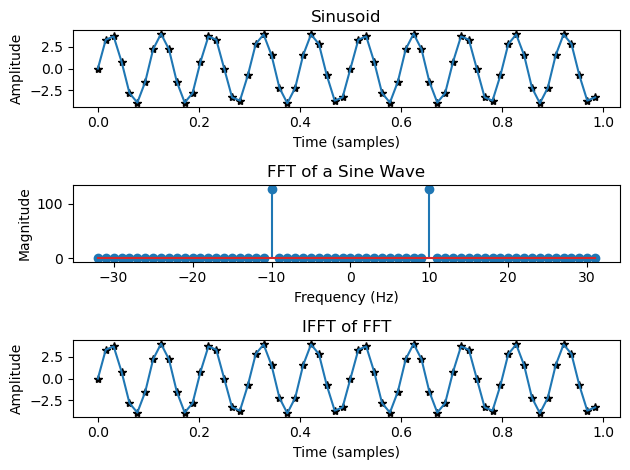

In [20]:
# Parameters:
fs = 64  # Sampling rate (samples per second)
T = 1  # Duration of the signal (seconds)
t = np.arange(0, T, 1/fs)  # Time vector
f = 10  # Frequency of the sine wave (Hz)
A = 4 # Amplitude
x = A*np.sin(2 * np.pi * f * t)

# Compute the FFT
X = np.fft.fft(x)
freqs = np.fft.fftfreq(len(x), 1/fs)

# Plot time data:
plt.subplot(3,1,1)
plt.plot(t,x,'*k')        
plt.plot(t,x) 
plt.title('Sinusoid')
plt.xlabel('Time (samples)') 
plt.ylabel('Amplitude')

# Plot the results
plt.subplot(3,1,2)
plt.stem(freqs, np.abs(X))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of a Sine Wave')

inversesignal = np.fft.ifft(X)
# Plot the results of Ifft
plt.subplot(3,1,3)
plt.plot(t,inversesignal,'*k')        
plt.plot(t,inversesignal) 
plt.title('IFFT of FFT')
plt.xlabel('Time (samples)') 
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

## Spectral Windowing
Previously, we interpreted our signal using a rectangular window to select a finite segment (in this case the entire signal which is of length N). In many cases, we want there to be tapering at ends of the segment (to the left and right of the signal) to ensure we are looking at the transient events that are happening within that window. In practice, the signal is first windowed and then the data is multiplied by the window function values. This helps reduce spectral leakage that may occur through the Fourier trasnform. We will go over a few examples of windowing below but will note that there are several different windowing functions that can be implemented. The few we will demonstrate are:

1) Rectangular Windowing
2) Hann Window
3) Blackman Window
4) Tukey Window

Demonstrations of windowing and it's impacts spectrally will be observed in the Spectrogram section.

### Rectangular Windowing
A rectangular window (also known as a boxcar window) is a function that is zero over the entirity of a signal except for an interval where it is equal to a constant. This is seen as:

$$
    W = A(H(x-a)-H(x-b))
$$
where H(x) is the heavised step function which is equal to A (amplitude) for a$\leq$x$\leq$b.

We demonstrate the boxcar/rectangular window and it's resulting frequency response in the below example.

In [10]:
from scipy import signal

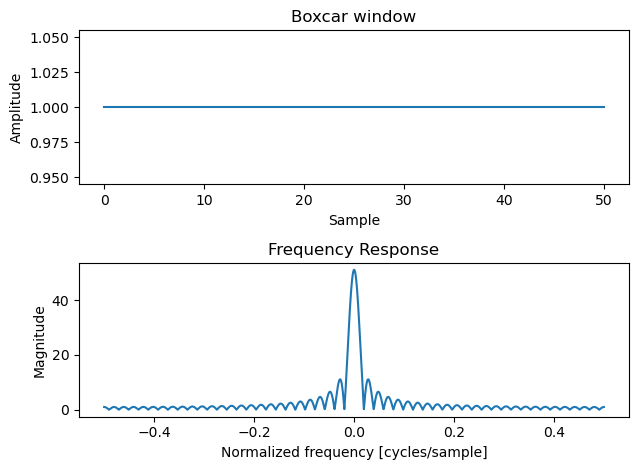

In [174]:
N = 51
window = signal.windows.boxcar(51)
plt.subplot(2,1,1)
plt.plot(window)
plt.title("Boxcar window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.subplot(2,1,2)
A = np.fft.fft(window, 2048)
freq = np.linspace(-0.5, 0.5, len(A))
response = np.abs(np.fft.fftshift(A))
plt.plot(freq, response)
plt.title("Frequency Response")
plt.ylabel("Magnitude")
plt.xlabel("Normalized frequency [cycles/sample]")

plt.tight_layout()
plt.show()

### Hann Window

$$
    W = 0.5 - 0.5\cos(\frac{2\pi n}{M-1})
$$
where $0\leq n \leq M-1$

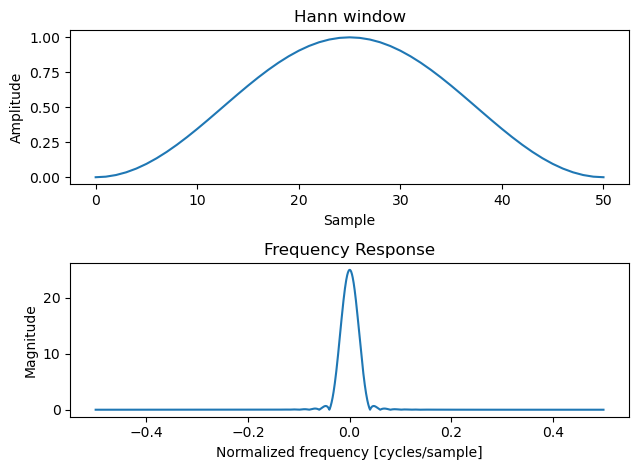

In [188]:
N = 51
window = signal.windows.hann(51)
plt.subplot(2,1,1)
plt.plot(window)
plt.title("Hann window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.subplot(2,1,2)
A = np.fft.fft(window, 2048)
freq = np.linspace(-0.5, 0.5, len(A))
response = np.abs(np.fft.fftshift(A))
plt.plot(freq, response)
plt.title("Frequency Response")
plt.ylabel("Magnitude")
plt.xlabel("Normalized frequency [cycles/sample]")

plt.tight_layout()
plt.show()

### Blackman Window

$$
    W = a_0 - a_1 \cos(\frac{2\pi n}{N}) + a_2\cos(\frac{4\pi n}{N})
$$

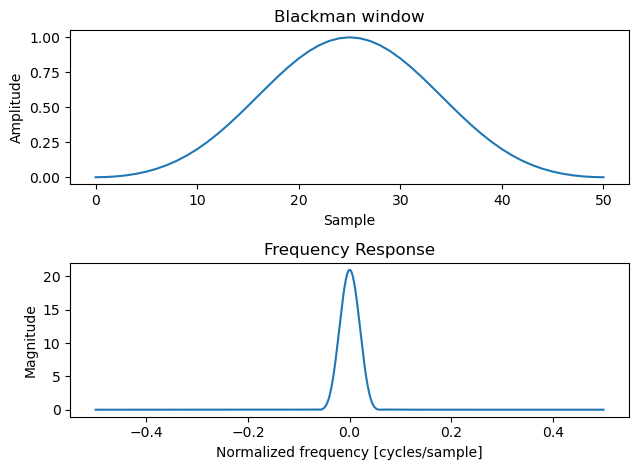

In [190]:
N = 51
window = signal.windows.blackman(51)
plt.subplot(2,1,1)
plt.plot(window)
plt.title("Blackman window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.subplot(2,1,2)
A = np.fft.fft(window, 2048)
freq = np.linspace(-0.5, 0.5, len(A))
response = np.abs(np.fft.fftshift(A))
plt.plot(freq, response)
plt.title("Frequency Response")
plt.ylabel("Magnitude")
plt.xlabel("Normalized frequency [cycles/sample]")

plt.tight_layout()
plt.show()

### Tukey Window
$$
    W = 0.5(1-\cos(2\pi \frac{n}{N}))
$$
where $0\leq n \leq N$

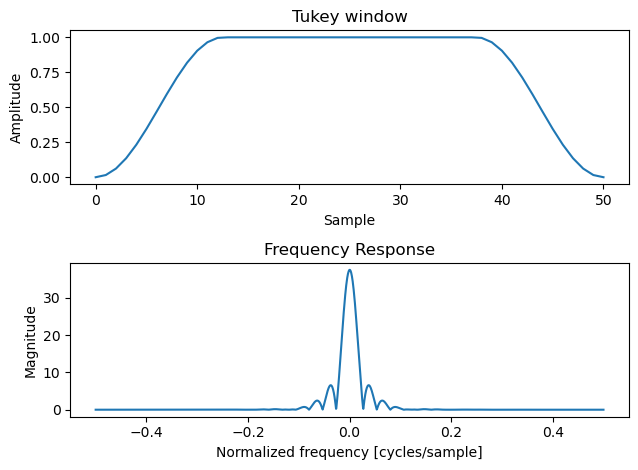

In [192]:
N = 51
window = signal.windows.tukey(51)
plt.subplot(2,1,1)
plt.plot(window)
plt.title("Tukey window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.subplot(2,1,2)
A = np.fft.fft(window, 2048)
freq = np.linspace(-0.5, 0.5, len(A))
response = np.abs(np.fft.fftshift(A))
plt.plot(freq, response)
plt.title("Frequency Response")
plt.ylabel("Magnitude")
plt.xlabel("Normalized frequency [cycles/sample]")

plt.tight_layout()
plt.show()

In practice, applying a window to a segment of sound minimizes the effect of spectral leakeage. 

<u>Spectral Leakage</u>: power spread over a frequency spectrum that occurs when a measured signal is not periodic in the sampled interval. 

This is demonstrated below where We don't have the full sinusodial and the energy of the sinusodial frequency begins to leak into others. 

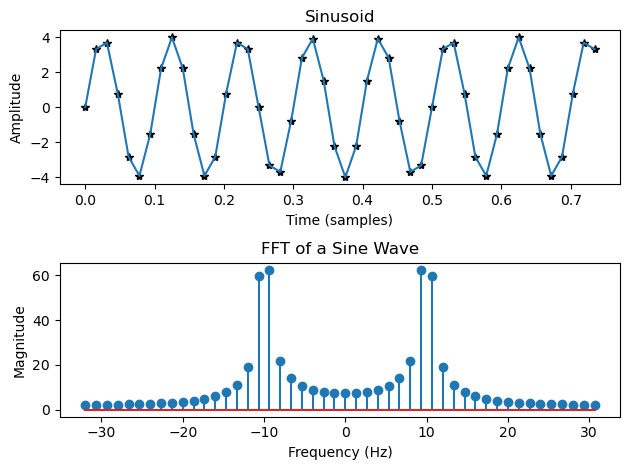

In [14]:
fs = 64  # Sampling rate (samples per second)
T = .75  # Duration of the signal (seconds)
t = np.arange(0, T, 1/fs)  # Time vector
f = 10  # Frequency of the sine wave (Hz)
A = 4 # Amplitude
x = A*np.sin(2 * np.pi * f * t)

# Compute the FFT
X = np.fft.fft(x)
freqs = np.fft.fftfreq(len(x), 1/fs)

# Plot time data:
plt.subplot(2,1,1)
plt.plot(t,x,'*k')        
plt.plot(t,x) 
plt.title('Sinusoid')
plt.xlabel('Time (samples)') 
plt.ylabel('Amplitude')

# Plot the results
plt.subplot(2,1,2)
plt.stem(freqs, np.abs(X))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of a Sine Wave')

plt.tight_layout()
plt.show()

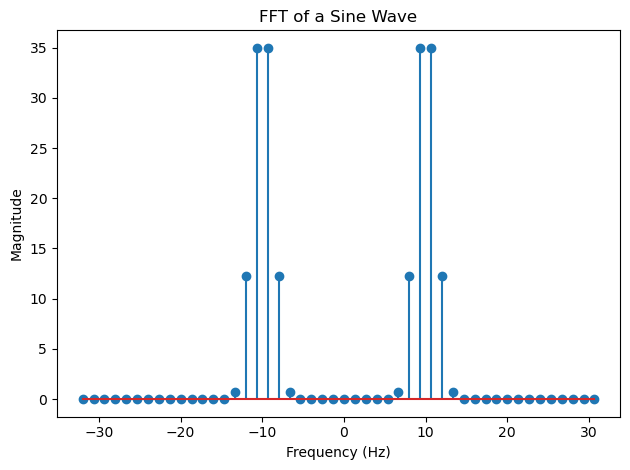

In [17]:
window = signal.windows.blackman(len(x))

# Compute the FFT
X = np.fft.fft(x*window)
freqs = np.fft.fftfreq(len(X), 1/fs)

plt.stem(freqs, np.abs(X))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of a Sine Wave')

plt.tight_layout()
plt.show()

We can see that the leakage of energy has been reduced from the 10Hz sinusodial signal. 

## Magnitude and Phase

<u>Magnitude:</u> Amplitude of the frequency components. Often the absolute value of 

$$
    |X(\omega)| = (Re{X(\omega)}^2 + Im{X(\omega)}^2)^{\frac{1}{2}}
$$

<u>Phase:</u> time shift of the frequency components relative to a reference point. 

$$
    \angle X(\omega) = \tan^{-1}\frac{Im{X(\omega)}}{Re{X(\omega)}}
$$

<u>Phase Delay:</u> Delay of a single frequency input into the system.

$$
    \tau_{ph}(\omega) = \frac{\angle X(\omega)}{\omega}
$$

<u>Group Delay:</u> Delay of a group of frequencies around $\omega$.

$$
    \tau_{gr}(\omega) = -\frac{\partial}{\partial \omega} \angle X(\omega)
$$

## High pass, low pass, and band pass filters
Suppose we have a messy signal that has multiple frequencies included in it. In order to analyze this signal frequency, we can apply a high, low, or band pass filter. Although the names are self explanitory we provide definitions below.

<u>Low Pass Filter:</u> A filter that passes low frequencies and rejects high frequencies.

<u>Band Pass Filter:</u> Filter that passes frequencies between a given band.

<u>High Pass Filter:</u> A filter that passes high frequencies and rejects low frequencies.

We explore a few filters below for low, band, and high pass. 

1) Chebyshev Type I
2) Chebyshev Type II
3) Butterworth
4) Bessel



### Chebyshev Type I
Low pass equation:
$$
    G(\omega) = \frac{1}{\sqrt{1+\epsilon^2 T^2_n (\omega / \omega_0)}}
$$

where $\omega$ is the angular frequency.

High pass equation:


### Chebyshev Type II
Low pass equation:
$$
    G(\omega) = \sqrt{\frac{\epsilon^2T_n^2(\omega / \omega)}{1+\epsilon^2T_n^2(\omega_0 / \omega)}}
$$

where $\omega$ is the angular frequency.

High pass equation:



### Butterworth
Low pass equation:
$$
    G(\omega) = \frac{1}{\sqrt{1+\omega^{2n}}}
$$

where $\omega$ is the angular frequency.

High pass equation:

$$
    G(\omega) = \frac{1}{\sqrt{1+\omega^{-2n}}}
$$

### Bessel
Low pass equation:
$$
    G(\omega) = \frac{1}{\sqrt{1+\omega^{2n}}}
$$

where $\omega$ is the angular frequency.

High pass equation:

$$
    G(\omega) = \frac{1}{\sqrt{1+\omega^{-2n}}}
$$

### Low Pass Filters

In [61]:
from scipy import signal

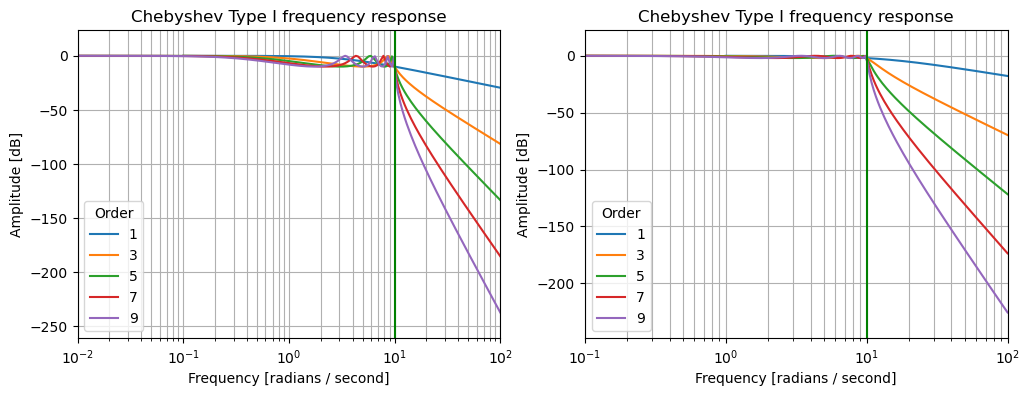

In [52]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
for i in range(1,10,2):
    b, a = signal.cheby1(i,10, 10, 'low', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type I frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(10, color='green') # cutoff frequency
plt.legend(['1','3','5','7','9'],title='Order')

plt.subplot(1,2,2)
for i in range(1,10,2):
    b, a = signal.cheby1(i,2, 10, 'low', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type I frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(10, color='green') # cutoff frequency
plt.legend(['1','3','5','7','9'],title='Order')
plt.show()

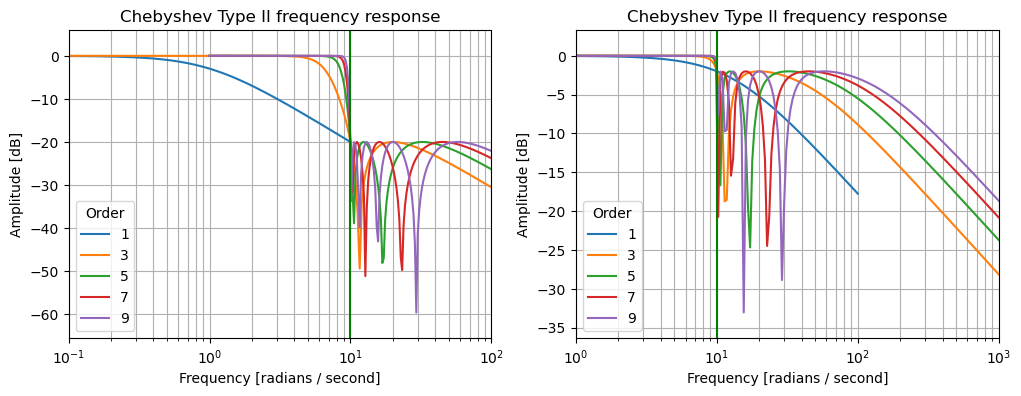

In [56]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
for i in range(1,10,2):
    b, a = signal.cheby2(i,20, 10, 'low', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type II frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(10, color='green') # cutoff frequency
plt.legend(['1','3','5','7','9'],title='Order')

plt.subplot(1,2,2)
for i in range(1,10,2):
    b, a = signal.cheby2(i,2, 10, 'low', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type II frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(10, color='green') # cutoff frequency
plt.legend(['1','3','5','7','9'],title='Order')
plt.show()

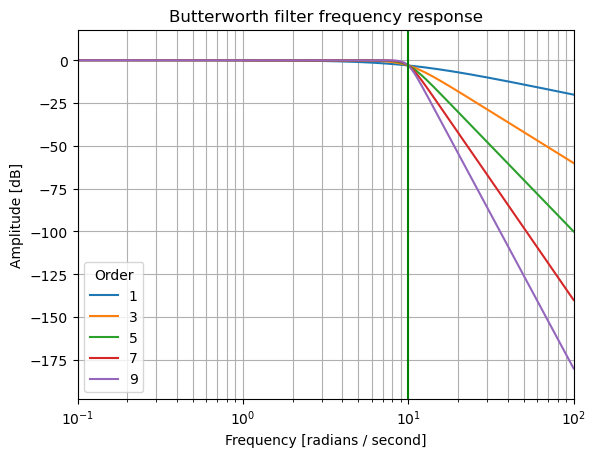

In [44]:
for i in range(1,10,2):
    b, a = signal.butter(i, 10, 'low', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(10, color='green') # cutoff frequency
plt.legend(['1','3','5','7','9'],title='Order')
plt.show()

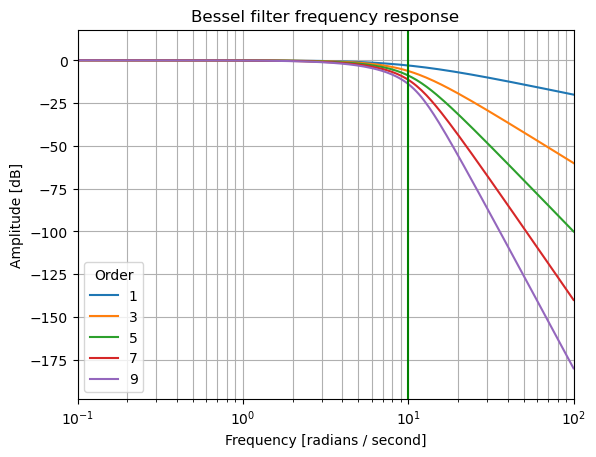

In [57]:
for i in range(1,10,2):
    b, a = signal.bessel(i, 10, 'low', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Bessel filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(10, color='green') # cutoff frequency
plt.legend(['1','3','5','7','9'],title='Order')
plt.show()

### Low Pass Example

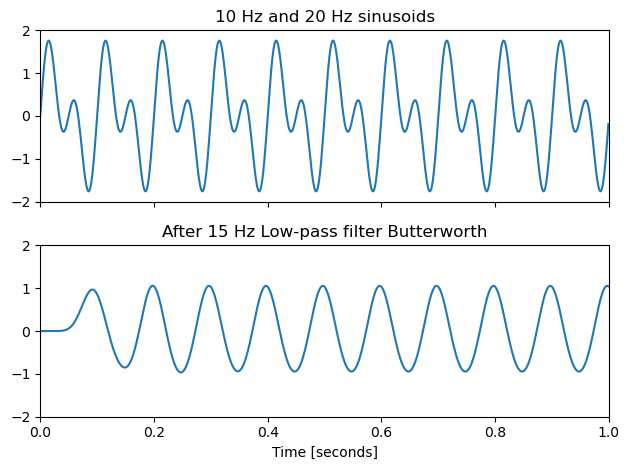

In [72]:
t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

sos = signal.butter(10, 15, 'lp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz Low-pass filter Butterworth')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

### High Pass Filter

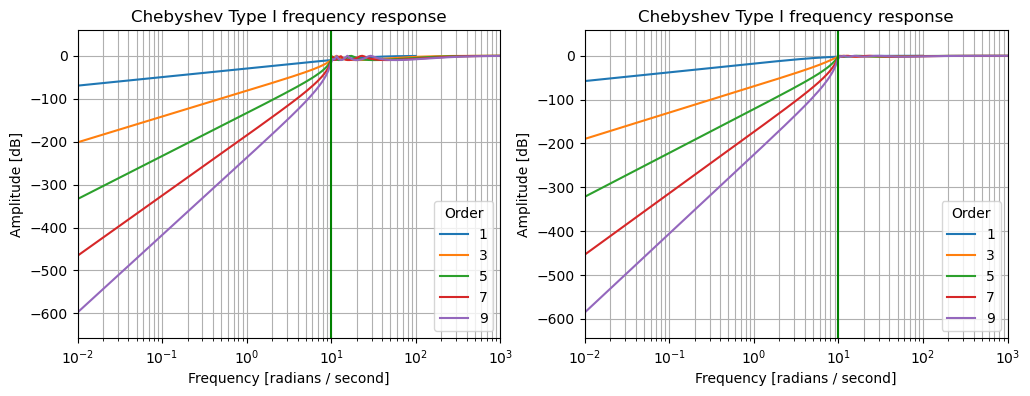

In [62]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
for i in range(1,10,2):
    b, a = signal.cheby1(i,10, 10, 'high', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type I frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(10, color='green') # cutoff frequency
plt.legend(['1','3','5','7','9'],title='Order')

plt.subplot(1,2,2)
for i in range(1,10,2):
    b, a = signal.cheby1(i,2, 10, 'high', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type I frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(10, color='green') # cutoff frequency
plt.legend(['1','3','5','7','9'],title='Order')
plt.show()

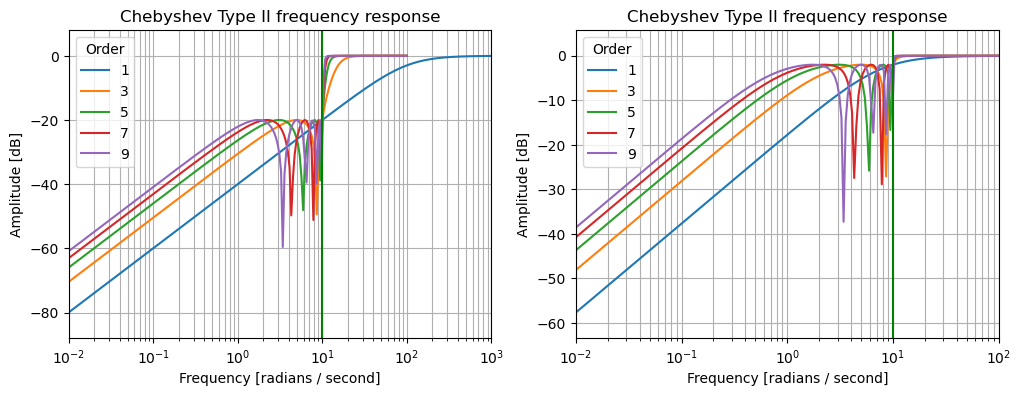

In [63]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
for i in range(1,10,2):
    b, a = signal.cheby2(i,20, 10, 'high', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type II frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(10, color='green') # cutoff frequency
plt.legend(['1','3','5','7','9'],title='Order')

plt.subplot(1,2,2)
for i in range(1,10,2):
    b, a = signal.cheby2(i,2, 10, 'high', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type II frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(10, color='green') # cutoff frequency
plt.legend(['1','3','5','7','9'],title='Order')
plt.show()

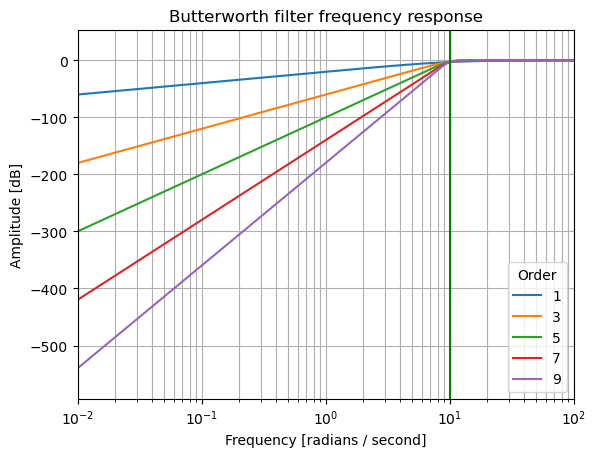

In [74]:
for i in range(1,10,2):
    b, a = signal.butter(i, 10, 'highpass', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(10, color='green') # cutoff frequency
plt.legend(['1','3','5','7','9'],title='Order')
plt.show()

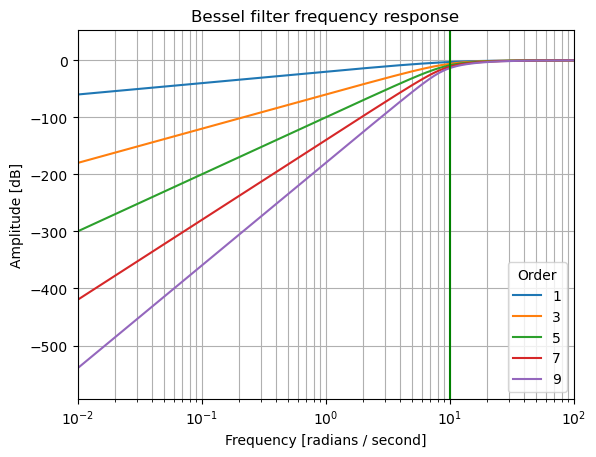

In [73]:
for i in range(1,10,2):
    b, a = signal.bessel(i, 10, 'highpass', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Bessel filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(10, color='green') # cutoff frequency
plt.legend(['1','3','5','7','9'],title='Order')
plt.show()

### High Pass Example

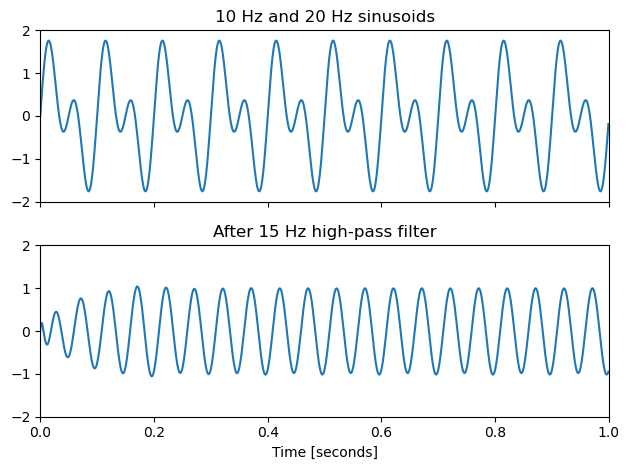

In [76]:
t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

sos = signal.butter(10, 15, 'hp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz high-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

### Band Pass Filter

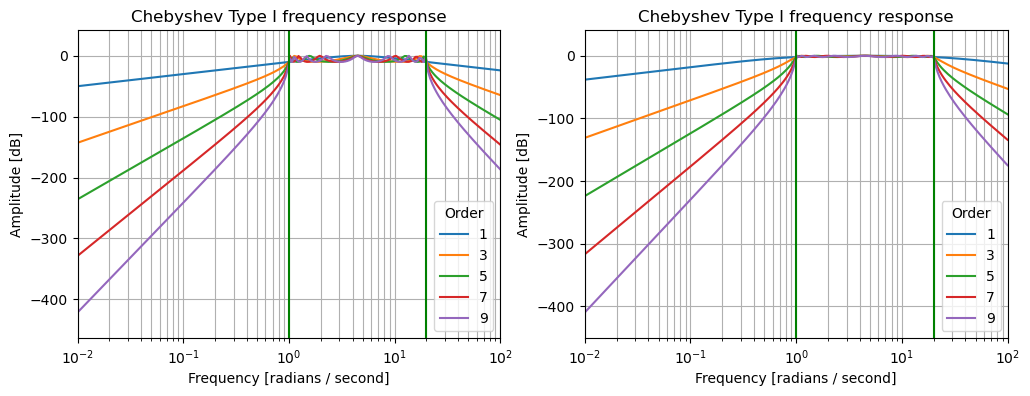

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
for i in range(1,10,2):
    b, a = signal.cheby1(i,10, [1,20], 'Bandpass', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type I frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(1, color='green') # cutoff frequency
plt.axvline(20, color='green') # cutoff frequency
plt.legend(['1','3','5','7','9'],title='Order')

plt.subplot(1,2,2)
for i in range(1,10,2):
    b, a = signal.cheby1(i,2, [1,20], 'Bandpass', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type I frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(1, color='green') # cutoff frequency
plt.axvline(20, color='green') # cutoff frequency
plt.legend(['1','3','5','7','9'],title='Order')
plt.show()

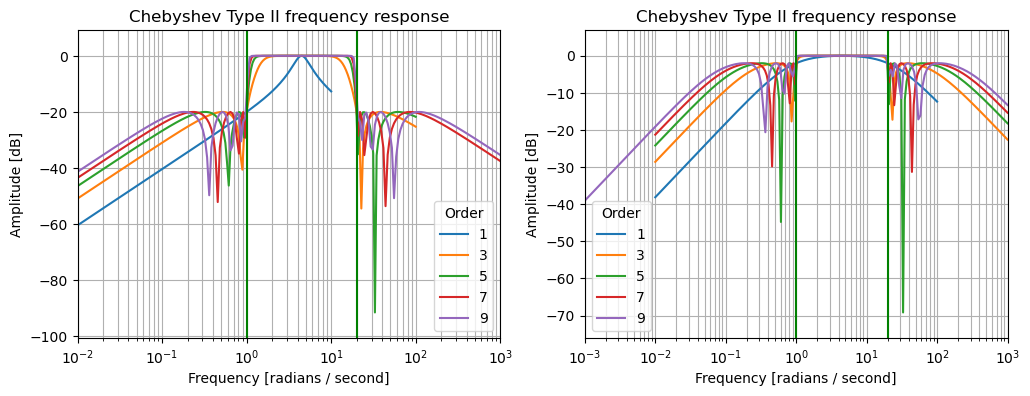

In [6]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
for i in range(1,10,2):
    b, a = signal.cheby2(i,20, [1,20], 'Bandpass', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type II frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(1, color='green') # cutoff frequency
plt.axvline(20, color='green') # cutoff frequency
plt.legend(['1','3','5','7','9'],title='Order')

plt.subplot(1,2,2)
for i in range(1,10,2):
    b, a = signal.cheby2(i,2, [1,20], 'Bandpass', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type II frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(1, color='green') # cutoff frequency
plt.axvline(20, color='green') # cutoff frequency
plt.legend(['1','3','5','7','9'],title='Order')
plt.show()

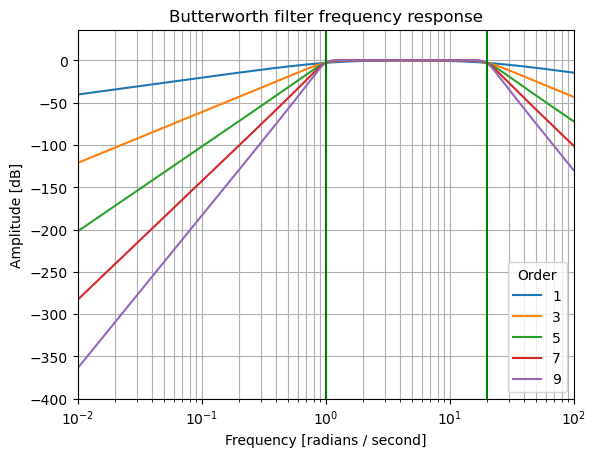

In [7]:
for i in range(1,10,2):
    b, a = signal.butter(i, [1,20], 'bandpass', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(1, color='green') # cutoff frequency
plt.axvline(20, color='green') # cutoff frequency
plt.legend(['1','3','5','7','9'],title='Order')
plt.show()

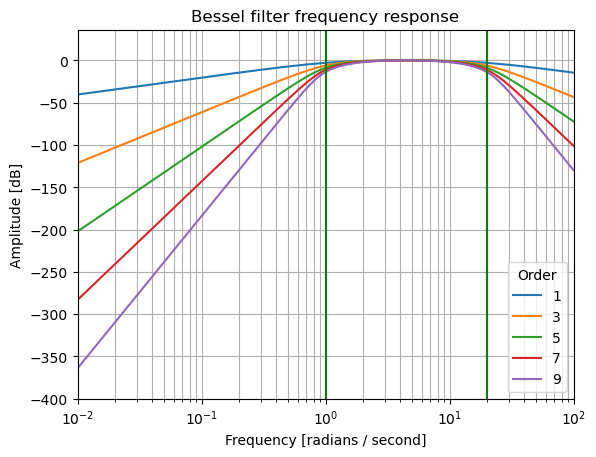

In [8]:
for i in range(1,10,2):
    b, a = signal.bessel(i, [1,20], 'bandpass', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Bessel filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(1, color='green') # cutoff frequency
plt.axvline(20, color='green') # cutoff frequency
plt.legend(['1','3','5','7','9'],title='Order')
plt.show()

### Example Bandpass Filter

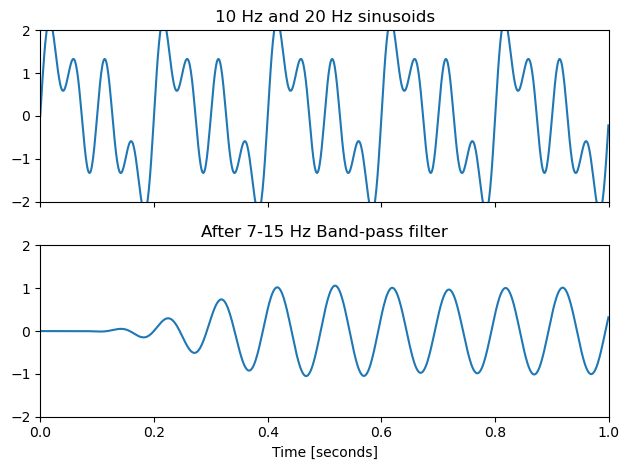

In [87]:
t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t) + np.sin(2*np.pi*5*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

sos = signal.butter(10, [7,15], 'bp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 7-15 Hz Band-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

## Spectrogram
If we window our signal with overlap and calculate DFT over these windowed segments, we can create a spectrogram. The spectrogram contains amplitude, frequency, and time information which is useful for transient sounds. 

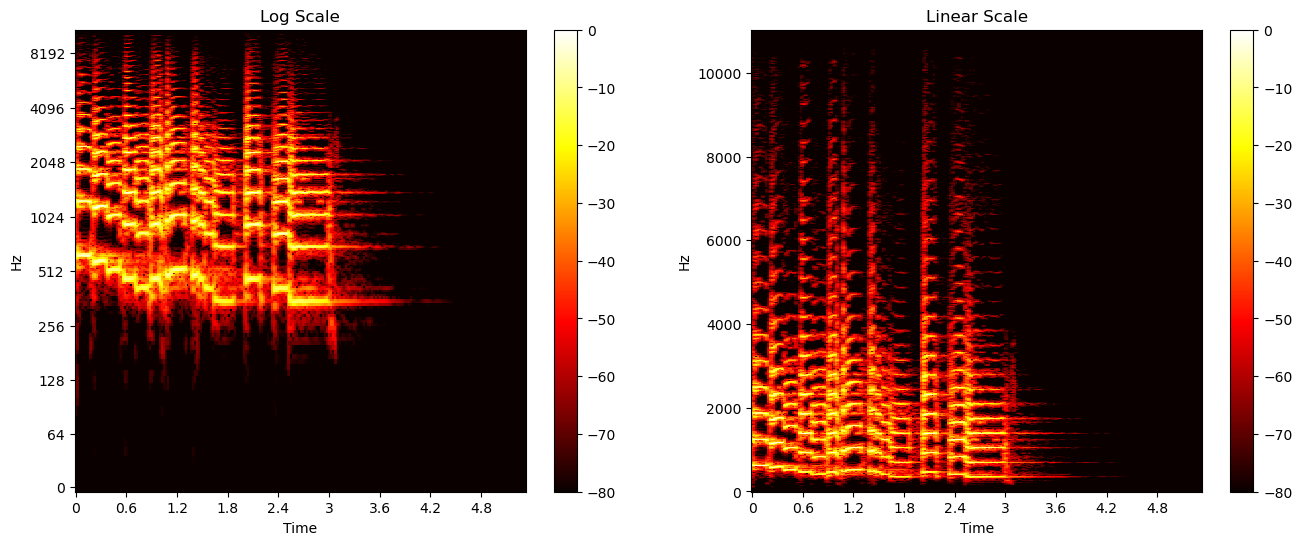

In [16]:
filename = librosa.ex('trumpet')
y, sr = librosa.load(filename)

# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(y, n_fft = n_fft, hop_length = hop_length))

# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
plt.subplot(1,2,1)
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'hot')
plt.colorbar();
plt.title('Log Scale')

plt.subplot(1,2,2)
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'linear',
                        cmap = 'hot')
plt.colorbar();
plt.title('Linear Scale')

plt.show()

# Citations 
1) ldkjf
2) 